<a href="https://colab.research.google.com/github/Megdadi/Data-analysis-sklearn-and-Models/blob/main/medical_insurance_charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [3]:
data=pd.read_excel('/content/drive/MyDrive/Projects/Test/medical_insurance_charges (2) (1) (2).xlsx')

In [4]:
data.head()

,patientid,age,sex,bmi,children,smoker,region,charges
0,10001.0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,10002.0,18.0,male,33.8,1.0,no,southeast,1725.55
2,10003.0,28.0,male,33.0,3.0,no,southeast,4449.46
3,10004.0,33.0,male,22.7,0.0,no,northwest,21984.47
4,10005.0,32.0,male,28.9,0.0,no,northwest,3866.86


In [5]:
data.shape

(1338, 8)

In [6]:
data=data.drop(columns='patientid')
print(data.shape)

(1338, 7)


In [7]:
data.info()

'''    This function shows ther are no missing values and
some features are needed to process them:
 sex, smoker and region(categorical data )    '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


'    This function shows ther are no missing values and\nsome features are needed to process them:\n sex, smoker and region(categorical data )    '

In [8]:
#or we can chek the missing values by isnull function
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


we can extract from this function  bmi mean is higher than 30 (bad news)



# **1.Data exploration**

In [10]:
labels=data['sex'].unique()
labels

array(['female', 'male'], dtype=object)

In [11]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1ce55abe50>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'female'),
  Text(0.018078568997005343, -1.0998514287589123, 'male')])

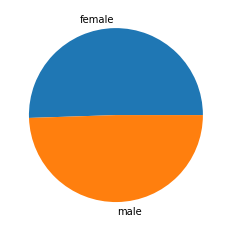

In [12]:
plt.pie(x=data['sex'].value_counts(),labels=data['sex'].unique())

gender of the clients are balanced

In [13]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
list(data['region'].unique())

['southwest', 'southeast', 'northwest', 'northeast']

Text(0, 0.5, 'count')

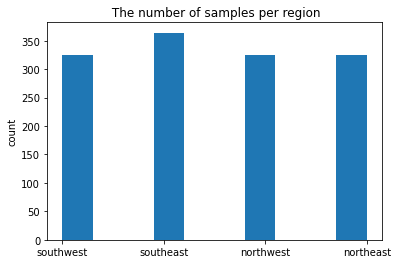

In [15]:
plt.hist(x=data['region'])
plt.title(' The number of samples per region')
plt.ylabel('count')


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


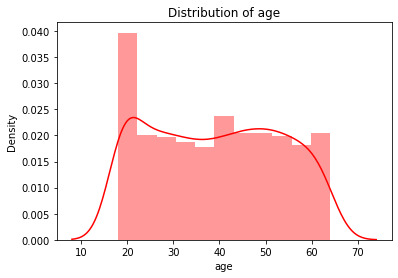

In [16]:
plt.title("Distribution of age")
sns.distplot(data["age"], color = 'r')

 the number of samples per region, southeast has some more samples

In [17]:
def get_age_group(age):
    if age < 30:
        category = "Young"
    elif age < 60:
        category = "Adult"
    else:
        category = "Elder"
    return category

# We generate a new attribute that indicates the age group.
data['age_group'] = data['age'].apply(get_age_group)

In [18]:
data['age_group'].value_counts()

Adult    807
Young    417
Elder    114
Name: age_group, dtype: int64

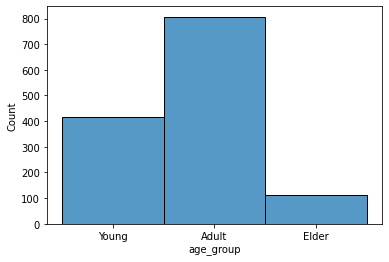

In [19]:
sns.histplot(data['age_group'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


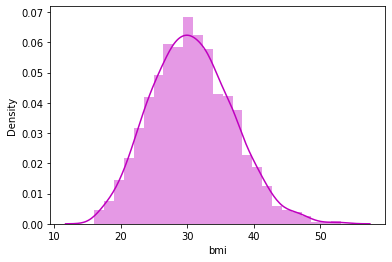

In [20]:
sns.distplot(data["bmi"], color = 'm')

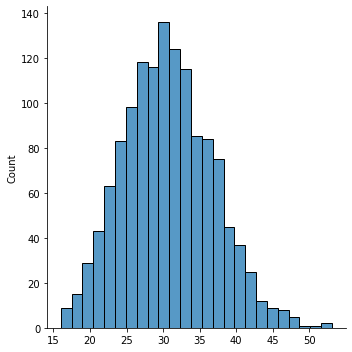

In [21]:
sns.displot(x=data['bmi'].values)

we can see the BMI feature has a normal distribution. 


In [22]:
def get_weight_status(bmi):
    if bmi < 19:
        status = "Underweight"
    elif bmi < 25:
        status = "Normal"
    elif bmi < 30:
        status = "Overweight"
    else:
        status = "Obese"
    return status

# We generate a new attribute that indicates the weight status.
data['weight_status'] = data['bmi'].apply(get_weight_status)

([<matplotlib.patches.Wedge at 0x7f1ce0639550>,
 [Text(-0.09801526084896708, 1.095624483406933, 'Overweight'),
  Text(-0.5069686360639045, -0.9762083804431841, 'Obese'),
  Text(0.8923414260769631, -0.6432159663028678, 'Normal'),
  Text(1.0982539483514577, -0.06195373217517927, 'Underweight')])

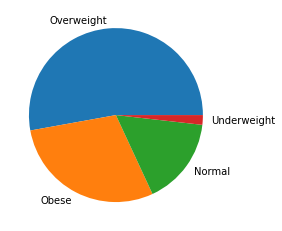

In [23]:
plt.pie(x=data['weight_status'].value_counts(),labels=data['weight_status'].unique())

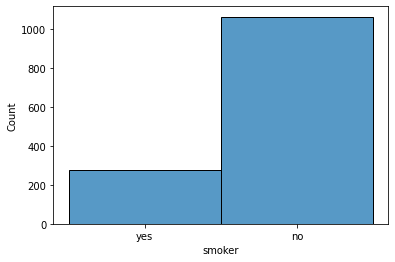

In [24]:
sns.histplot(data['smoker'])

In [25]:
[data.columns]

[Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
        'age_group', 'weight_status'],
       dtype='object')]

Text(0.5, 1.0, 'relation between weight_status and chareges')

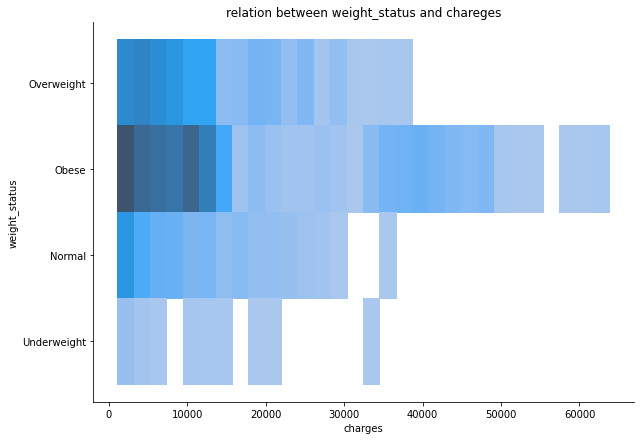

In [26]:
sns.displot(data,x=data['charges'],y=data['weight_status'], height=6,aspect=1.5)
plt.title('relation between weight_status and chareges')

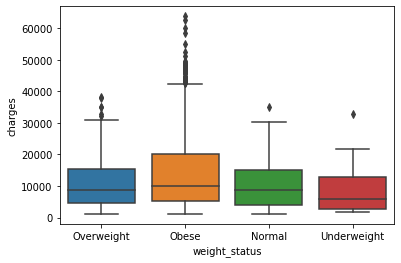

In [27]:
sns.boxplot(y="charges", x="weight_status", data = data)

we can clearly see the fact that the more unhealthy the person is the higher the charges are.

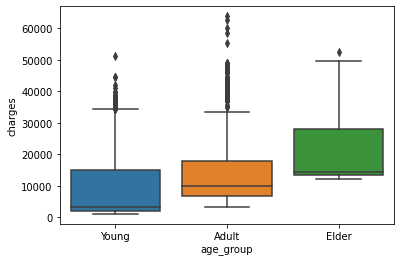

In [28]:
sns.boxplot(y="charges", x="age_group", data =  data)


we can clearly see the fact that the Elder people are the higher the charges.

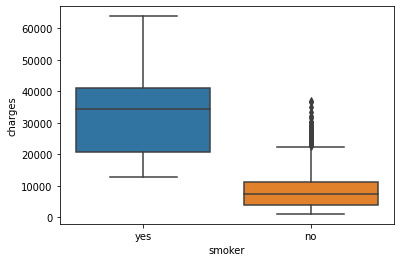

In [29]:
sns.boxplot(y="charges", x="smoker", data =  data)


 there is a strong correlation between charges and smoker

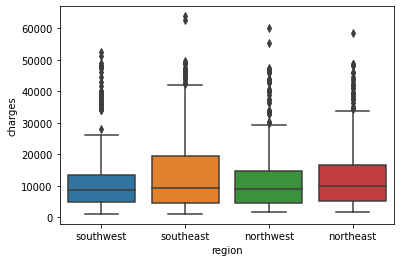

In [30]:
sns.boxplot(y="charges", x="region", data =  data)


weak relation between region and charges

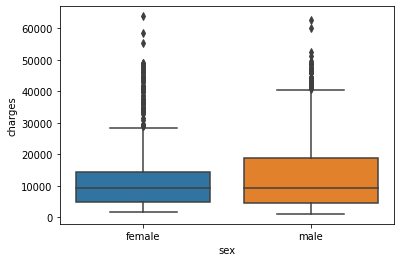

In [31]:
sns.boxplot(y="charges", x="sex", data =  data)

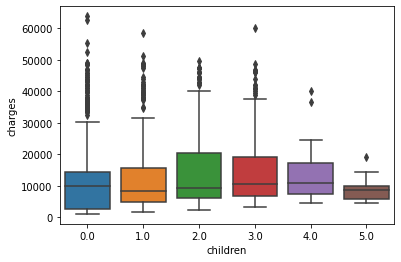

In [32]:
sns.boxplot(y="charges", x="children", data =  data)


# **Handling categorical features**

In [33]:
# Ordinal
data['smoker']=data['smoker'].map(dict(no=0, yes=1))
data['region']=data['region'].map(dict(southwest=0, northwest=1, northeast=2, southeast=3))
# nominal 

data = pd.get_dummies(data=data, columns=['sex'])

data.head()

,age,bmi,children,smoker,region,charges,age_group,weight_status,sex_female,sex_male
0,19.0,27.9,0.0,1,0,16884.92,Young,Overweight,1,0
1,18.0,33.8,1.0,0,3,1725.55,Young,Obese,0,1
2,28.0,33.0,3.0,0,3,4449.46,Young,Obese,0,1
3,33.0,22.7,0.0,0,1,21984.47,Adult,Normal,0,1
4,32.0,28.9,0.0,0,1,3866.86,Adult,Overweight,0,1


In [34]:
data=data[['age', 'bmi', 'children','smoker', 'region', 'sex_female', 'sex_male', 'charges']]
data.head()

,age,bmi,children,smoker,region,sex_female,sex_male,charges
0,19.0,27.9,0.0,1,0,1,0,16884.92
1,18.0,33.8,1.0,0,3,0,1,1725.55
2,28.0,33.0,3.0,0,3,0,1,4449.46
3,33.0,22.7,0.0,0,1,0,1,21984.47
4,32.0,28.9,0.0,0,1,0,1,3866.86


In [35]:
data.corr()['charges']

age           0.299008
bmi           0.198576
children      0.067998
smoker        0.787251
region        0.077042
sex_female   -0.057292
sex_male      0.057292
charges       1.000000
Name: charges, dtype: float64

<ipython-input-36-a57a7ecf2ba0>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


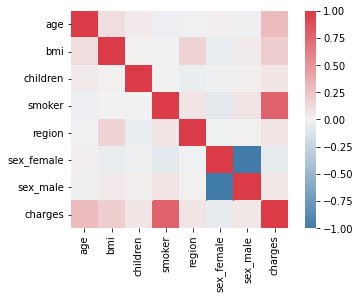

In [36]:
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True)

# **Spliting and scaling**

In [45]:
X = data.drop(['charges','region'], axis = 1)
y = data['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


ModuleNotFoundError: ignored

In [38]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.7 MB/s eta 0:00:00


In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [47]:
lr = LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

xgb = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)

cb = CatBoostRegressor(learning_rate =.01, max_depth =5, verbose = 0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Gradient Boosting Regressor', gbr), ('XGBoost', xgb), ('catboost', cb)]

Linear Regression : 80 %
K Nearest Neighbours : 90 %
Decision Tree : 90 %
Random Forest : 90 %
AdaBoost : 90 %
Gradient Boosting Regressor : 90 %
[21:32:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost : 90 %
catboost : 90 %


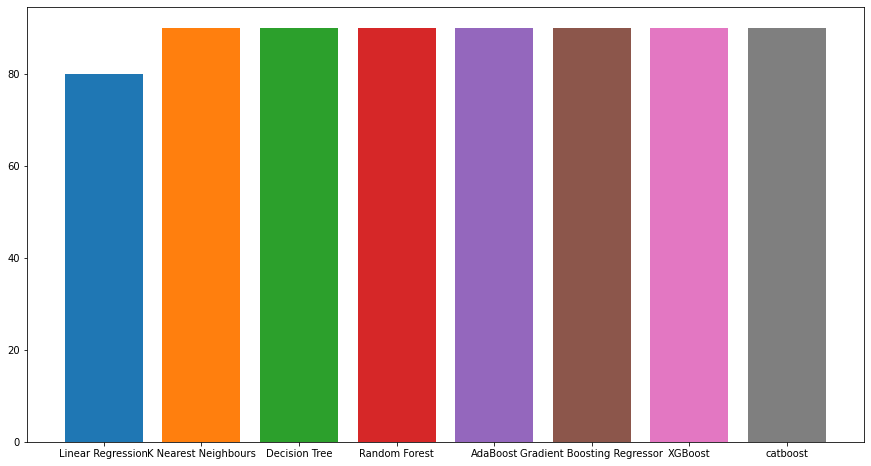

In [48]:
from sklearn.metrics import r2_score

for regressor_name, regressor in regressors:
 
    # Fit regressor to the training set
    regressor.fit(X_train, y_train)    
   
    # Predict 
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),1)*100
    

   
    # Evaluate  accuracy on the test set
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (15,8)
    plt.bar(regressor_name,accuracy)
    